# Data exploration & Data visualization

## Load dataset

In [1]:
path = "D:/202209/tbrain/訓練資料集_first/"
import os
os.chdir(path)
# import glob
# print(glob.glob(os.path.join(path, "*.csv")))
## 備註
## 這邊利用 os.path.join 來連接指定字串形成路徑，因為不同系統下的分隔符號可能不同

In [2]:
# from gettext import dpgettext         #??
# from mimetypes import read_mime_types #??
import pandas as pd
 
#ccba = pd.read_csv("public_train_x_ccba_full_hashed.csv")
#cdtx = pd.read_csv("public_train_x_cdtx0001_full_hashed.csv")
custinfo = pd.read_csv("public_train_x_custinfo_full_hashed.csv")
dp = pd.read_csv("public_train_x_dp_full_hashed.csv")
#remit = pd.read_csv("public_train_x_remit1_full_hashed.csv")
alert_public = pd.read_csv("public_x_alert_date.csv")
alert_train = pd.read_csv("train_x_alert_date.csv")
y = pd.read_csv("train_y_answer.csv")

In [19]:
train = y.join(alert_train.set_index('alert_key'), on='alert_key')
train = train.join(custinfo.set_index('alert_key'), on='alert_key')
train.head()

,alert_key,sar_flag,date,cust_id,risk_rank,occupation_code,total_asset,AGE
0,171189,0,0,972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...,1,17.0,375576.0,4
1,171202,0,0,a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...,3,12.0,2717416.0,2
2,171599,0,0,3433ecc068ed1c9e2f5037cab5d42d7b901e9bd624c1fb...,1,12.0,326517.0,4
3,171737,0,0,a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...,3,14.0,1014759.0,4
4,171142,0,0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3


In [20]:
test = y.join(alert_public.set_index('alert_key'), on='alert_key')
test = test.join(custinfo.set_index('alert_key'), on='alert_key')
test.head()

,alert_key,sar_flag,date,cust_id,risk_rank,occupation_code,total_asset,AGE
0,171189,0,NaN,972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...,1,17.0,375576.0,4
1,171202,0,NaN,a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...,3,12.0,2717416.0,2
2,171599,0,NaN,3433ecc068ed1c9e2f5037cab5d42d7b901e9bd624c1fb...,1,12.0,326517.0,4
3,171737,0,NaN,a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...,3,14.0,1014759.0,4
4,171142,0,NaN,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3


In [18]:
len(test['date']) - test['date'].isnull().sum()

0

In [5]:
print(target.shape, y.shape, alert_public.shape, alert_train.shape)

(23906, 3) (23906, 2) (1845, 2) (23906, 2)


In [5]:
print('ccba', ccba.shape)
print('cdtx', cdtx.shape)
print('custinfo', custinfo.shape)
print('dp', dp.shape)
print('remit', remit.shape)
print('alert_public', alert_public.shape)
print('alert_train', alert_train.shape)
print('y', y.shape)

ccba (59075, 10)
cdtx (1043014, 5)
custinfo (25751, 6)
dp (1969818, 12)
remit (17167, 4)
alert_public (1845, 2)
alert_train (23906, 2)
y (23906, 2)


## Overview

In [9]:
johndoe = '0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381'

In [133]:
ccba.loc[ccba['cust_id']==johndoe]

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
6154,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,0.0,306,20238.0,1700.0,0.0,0.0,0.0,0.0,0.0
6155,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,0.0,334,20238.0,5266.0,0.0,0.0,0.0,5266.0,0.0
6156,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,5266.0,365,20238.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
cdtx.loc[cdtx['cust_id']==johndoe]

,cust_id,date,country,cur_type,amt
121107,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,336,130,47,1700.0
121108,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,346,130,47,2169.0
121109,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,348,130,47,2408.0


In [162]:
print(len(custinfo.loc[custinfo['cust_id']==johndoe]))
johndoe_info = custinfo.loc[custinfo['cust_id']==johndoe]

43


In [167]:
johndoe_alert = johndoe_info['alert_key']
print(len(johndoe_alert))

43


In [5]:
print(len(dp.loc[dp['cust_id']==johndoe]))
dp.loc[dp['cust_id']==johndoe].sort_values(['tx_date']).head(10)

1398


,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
377236,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,5,9,2,98571.0,0.259,20,NaN,NaN,0,1
377646,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,5,9,2,5004.0,0.259,20,NaN,NaN,0,1
377644,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,5,9,2,5004.0,0.259,20,NaN,NaN,0,1
377233,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,5,9,2,23369.0,0.259,20,NaN,NaN,0,1
377219,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,5,9,2,14056.0,0.259,20,NaN,NaN,0,1
377618,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,5,9,2,60053.0,0.259,20,NaN,NaN,0,1
377640,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,14,14,2,1001.0,28.395,20,NaN,NaN,0,1
377246,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,14,14,2,2010.0,28.395,20,NaN,NaN,0,1
377227,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,15,11,2,226.0,28.345,20,NaN,NaN,0,1
377632,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,15,11,2,2002.0,28.345,20,NaN,NaN,0,1


In [148]:
remit.loc[remit['cust_id']==johndoe]

,cust_id,trans_date,trans_no,trade_amount_usd
4828,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,223,3,6071.0
4829,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,312,4,60024.0
4830,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,328,4,531413.0
4831,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,356,0,2109.0
4832,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,365,0,2387.0


In [179]:
print((y.loc[ y['alert_key'].isin(johndoe_alert) ]['sar_flag']==1).sum())

0


custinfo.alert_key, alert_train.alert_key, alert_test.alert_key are no duplicated.

### ccba, go over credit limit

In [94]:
cc_overuse = ccba[ (ccba['cycam'] < ccba['usgam']) ].groupby('cust_id').size().sort_values(ascending=False)
# 有644人超額使用信用卡，其中77人整年(13)都超額，289人指超額1次

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x, y, tune):
    for i in range(len(x)):
        plt.text(x[i], y[i]+tune, y[i], ha = 'center')

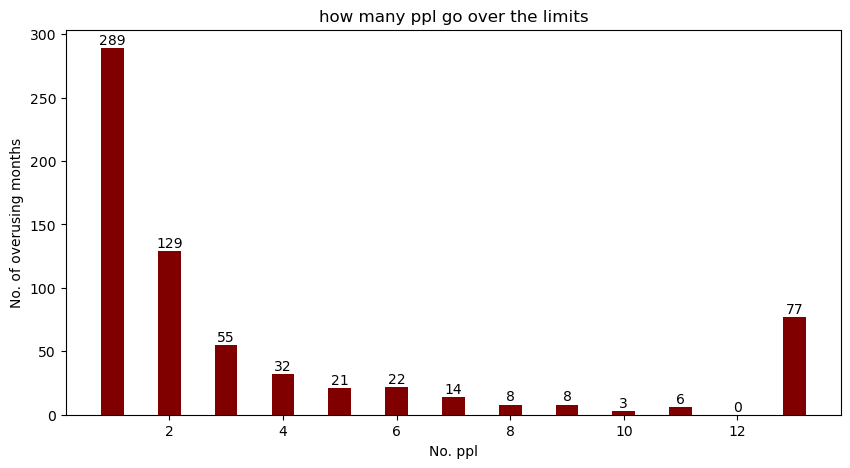

In [95]:
fig = plt.figure(figsize = (10, 5))

months = [*range(1,14)]
values = [sum(cc_overuse==i) for i in range(1,14)]

# creating the bar plot
plt.bar(months, values, color ='maroon',
        width = 0.4)

# calling the function to add value labels
addlabels(months, values, 3)

plt.xlabel("No. ppl")
plt.ylabel("No. of overusing months")
plt.title("how many ppl go over the limits")
plt.show()

### ccba, cash

In [4]:
test_y = ccba['cucah']
text_X= ccba[['cucsm','inamt','csamt','clamt','usgam','cycam']] 

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(text_X, test_y)

LinearRegression()

In [20]:
pd.DataFrame({
     'param' : model.feature_names_in_ , 
     'coef' : model.coef_
     }).sort_values(by=['coef'])

,param,coef
1,inamt,-0.000318
0,cucsm,-0.000017
5,cycam,0.000016
4,usgam,0.000021
2,csamt,0.300723
3,clamt,1.069875


In [15]:
cash = (ccba['cucah'] - ccba['csamt'] - ccba['clamt'])
# cash[cash.astype(bool)]
cash.describe()

count     59075.000000
mean        104.050783
std        4959.320391
min     -202909.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      614124.000000
dtype: float64

### cdtx, country

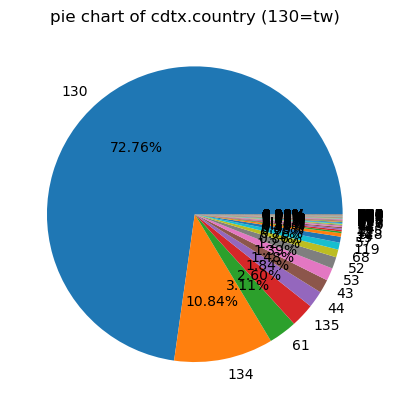

In [195]:
'''
country_group = cdtx.groupby('country')
n_country_group = country_group.size().sort_values(ascending=False)

# pie chart
plt.pie(n_country_group, labels = n_country_group.index, autopct='%.2f%%')
plt.title("pie chart of cdtx.country (130=tw)")
plt.show() 
'''

In [38]:
print(n_country_group.iloc[:15])

country
130    758909
134    113098
61      32445
135     27127
44      19151
43      15405
53      14500
52      13270
68       8948
119      7930
57       6787
19       3977
118      1941
42       1853
125      1677
dtype: int64


### cdtx, currency type

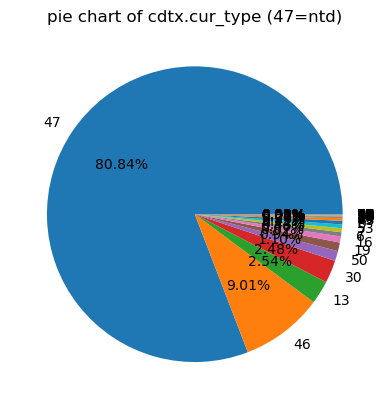

In [196]:
'''cur_group = cdtx.groupby('cur_type')
n_cur_group = cur_group.size().sort_values(ascending=False)

# pie chart
plt.pie(n_cur_group, labels = n_cur_group.index, autopct='%.2f%%')
plt.title("pie chart of cdtx.cur_type (47=ntd)")
plt.show() 
'''

In [52]:
len(cur_group.size())

51

In [48]:
print(n_cur_group.iloc[:15])

cur_type
47    843174
46     94024
13     26538
30     25912
50     11433
19      9826
16      6937
6       4806
7       4530
53      4275
0       4103
45      2940
34       778
36       533
24       424
dtype: int64


### custinfo, risk_rank

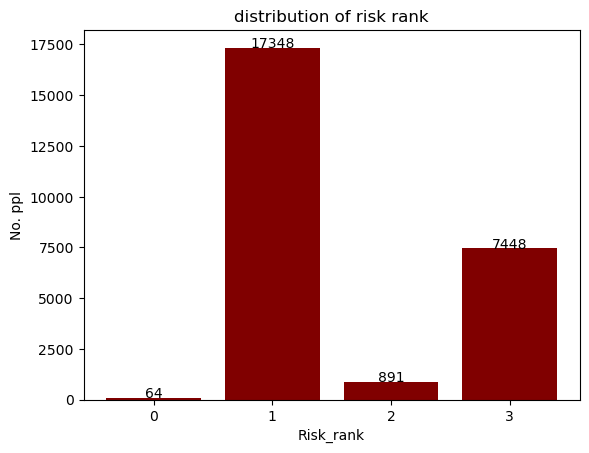

In [103]:
'''risk_group = custinfo.groupby('risk_rank')
risk_idx = ['0','1','2','3']

# bar chart
plt.bar(risk_idx, risk_group.size(), 
        color ='maroon')

# calling the function to add value labels
addlabels(risk_idx, risk_group.size(), 10)

plt.xlabel("Risk_rank")
plt.ylabel("No. ppl")
plt.title("distribution of risk rank")
plt.show()
'''

### custinfo, occupation_code

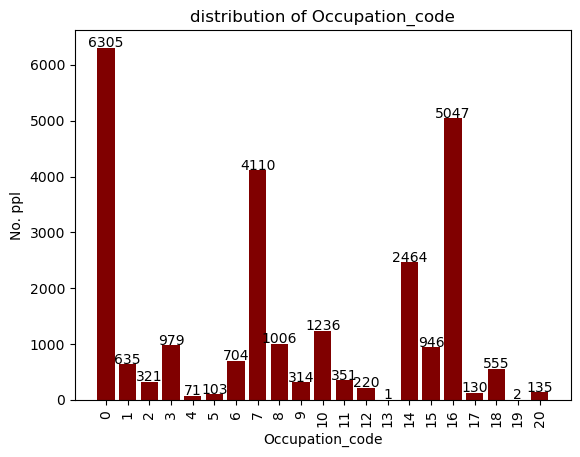

In [116]:
'''
job_group = custinfo.groupby('occupation_code')
n_job_group = job_group.size().sort_values(ascending=False)

# bar chart
plt.bar(n_job_group.index, job_group.size(), 
        color ='maroon')

# calling the function to add value labels
addlabels(n_job_group.index, job_group.size(), 10)


plt.xticks(n_job_group.index, rotation='vertical')

plt.xlabel("Occupation_code")
plt.ylabel("No. ppl")
plt.title("distribution of Occupation_code")
plt.show()
'''

### custinfo_AGE

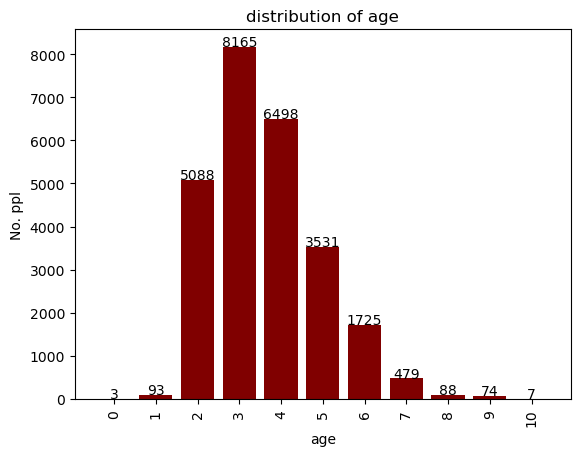

In [17]:
'''
age_group = custinfo.groupby('AGE')
n_age_group = age_group.size()

# bar chart
plt.bar(n_age_group.index, age_group.size(), 
        color ='maroon')

# calling the function to add value labels
addlabels(n_age_group.index, age_group.size(), 15)


plt.xticks(n_age_group.index, rotation='vertical')

plt.xlabel("age")
plt.ylabel("No. ppl")
plt.title("distribution of age")
plt.show()
'''

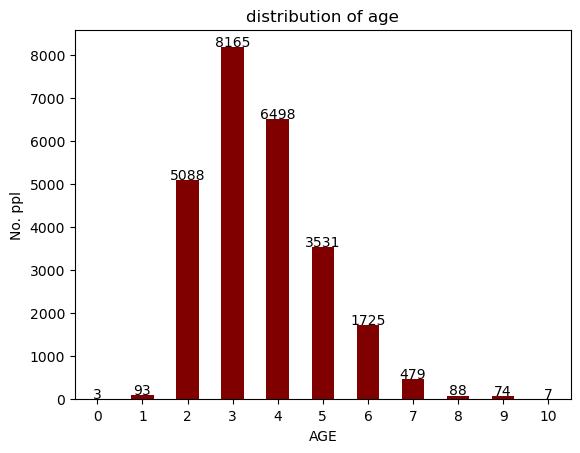

In [22]:
# apply groupby on the age column
# plotting

custinfo.groupby('AGE').size().plot(kind = "bar", ylabel="No. ppl", rot=1, color ='maroon', title='distribution of age')
addlabels(n_age_group.index, age_group.size(), 15)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# function to add value labels
def addpielabels(target):
    pielabels = []
    for i in range(len(target)):
        pielabels.append((target.index[i], target.values[i]))
    return pielabels

### alert

In [9]:
alert_public.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [56]:
alert_train.head()

,alert_key,date
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0


In [7]:
alert_public.date.unique()

array([365, 370, 371, 372, 375, 376, 377, 378, 379, 382, 383, 384, 385,
       386, 389, 390, 391, 392, 393], dtype=int64)

In [6]:
alert_train.date.unique()

array([  0,   5,   6,   7,   8,  11,  12,  13,  14,  15,  18,  19,  20,
        21,  22,  25,  26,  27,  28,  32,  33,  34,  35,  36,  39,  40,
        41,  42,  43,  46,  47,  48,  49,  50,  53,  54,  55,  56,  57,
        60,  61,  62,  63,  64,  67,  68,  69,  70,  71,  75,  76,  77,
        78,  81,  82,  83,  84,  85,  88,  89,  90,  91,  92,  95,  96,
        97,  98,  99, 102, 103, 104, 105, 106, 109, 110, 111, 112, 113,
       116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 130, 131, 132,
       133, 134, 137, 138, 139, 140, 141, 144, 145, 146, 147, 148, 151,
       152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 165, 166, 167,
       168, 169, 174, 175, 176, 179, 180, 181, 182, 183, 186, 187, 188,
       189, 190, 194, 195, 196, 197, 200, 201, 202, 203, 204, 207, 208,
       209, 210, 211, 215, 216, 217, 218, 221, 222, 223, 224, 225, 229,
       230, 231, 232, 235, 236, 237, 238, 239, 242, 244, 245, 246, 250,
       251, 252, 253, 257, 258, 259, 260, 263, 265, 266, 267, 27

- we can see some of days with no  alert, and I assume they are **weekends or holidays**.

In [60]:
alert_train.merge(alert_public, on='date', how='outer').head()

,alert_key_x,date,alert_key_y
0,171189.0,0,NaN
1,171202.0,0,NaN
2,171599.0,0,NaN
3,171737.0,0,NaN
4,171142.0,0,NaN


In [71]:
alert_public.groupby('date').size()

date
365     80
370    132
371     79
372     91
375    126
376    125
377    186
378    107
379     71
382    104
383     90
384     66
385     66
386     89
389     99
390     77
391     76
392     79
393    102
dtype: int64

In [78]:
alert_train.groupby('date').size().isnull().sum()

0

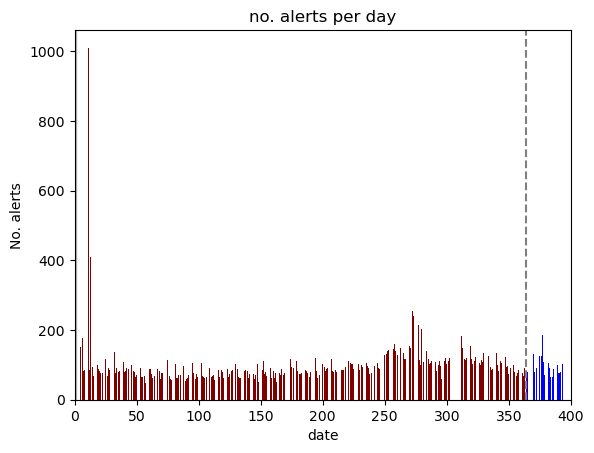

In [79]:
#cut = 364
#plt.bar(x[:x0+1], y[:x0+1])
#plt.bar(x[x0:], y[x0:])
 #(x,y)

# bar chart
plt.bar(alert_public.groupby('date').size().index, alert_public.groupby('date').size(), 
        color ='blue')
plt.bar(alert_train.groupby('date').size().index, alert_train.groupby('date').size(), 
        color ='maroon')       

# calling the function to add value labels
# addlabels(alert_group.size().index,  alert_group.size(), 15)

for i in range(len(alert_public.groupby('date').size().index)):
        if alert_public.groupby('date').size().index[i] == 0:
            plt.axvspan(i, i+1, alpha=0.5, color='gray')

for i in range(len(alert_train.groupby('date').size().index)):
        if alert_train.groupby('date').size().index[i] == 0:
            plt.axvspan(i, i+1, alpha=0.5, color='gray')
            
#plt.xticks( alert_group.size().index, rotation='vertical')

plt.axvline(x = 364, color = 'gray', linestyle='dashed')
plt.xlim((0,400))
plt.xlabel("date")
plt.ylabel("No. alerts")
plt.title("no. alerts per day")

plt.show()
# addlabels(n_age_group.index, age_group.size(), 15)

### y, sar

In [ ]:
sum(y.duplicated())

0

In [ ]:
print( len(y), sum(y['sar_flag']), (sum(y['sar_flag'])/len(y)))

23906 234 0.009788337655818623


## dp

### dp, debit_credit

<AxesSubplot:>

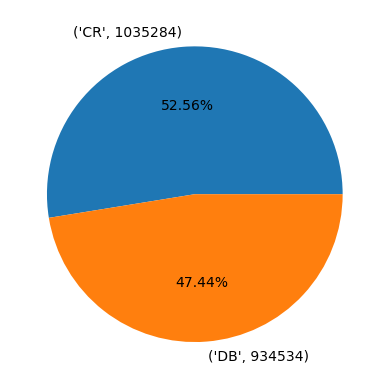

In [34]:
dp.groupby('debit_credit').size().plot(kind = 'pie', labels = addpielabels(dp['debit_credit'].value_counts()), autopct='%.2f%%')

- is there missing values in dp?

In [26]:
dp.isnull().sum()

cust_id                  0
debit_credit             0
tx_date                  0
tx_time                  0
tx_type                  0
tx_amt               22015
exchg_rate               0
info_asset_code          0
fiscTxId           1043090
txbranch           1003150
cross_bank               0
ATM                      0
dtype: int64

- how many differn values do each columns have?

In [138]:
for i in list(dp.columns):
    print( f'{i}, {len(dp.groupby(i).size().unique())} ')

cust_id, 1043 
debit_credit, 2 
tx_date, 374 
tx_time, 24 
tx_type, 3 
tx_amt, 717 
exchg_rate, 300 
info_asset_code, 22 
fiscTxId, 29 
txbranch, 217 
cross_bank, 2 
ATM, 2 
NTD, 684 


- by Q&A, tx_amt*exchg_rate = NTD

In [29]:
# calculate into NTD
dp['NTD'] = dp['tx_amt']*dp['exchg_rate'].round(2)

# is it originally used NTD?
dp['isNTD'] = dp.loc[dp["exchg_rate"] == 1.0, "isNTD"] = 1
dp['isNTD'] = dp.loc[dp["exchg_rate"] != 1.0, "isNTD"] = 0

dp[dp['exchg_rate']!=1.0].head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,isNTD,NTD
199,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,CR,230,14,2,3715.0,27.83,20,NaN,NaN,0,1,0,103388.45
200,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,CR,231,9,2,5029.0,27.80,20,NaN,NaN,0,1,0,139806.20
201,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,DB,231,14,2,3715.0,27.84,20,NaN,NaN,0,1,0,103425.60
202,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,DB,231,14,2,8428.0,27.84,20,NaN,NaN,0,1,0,234635.52
205,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,DB,291,11,2,2064.0,27.63,20,NaN,NaN,0,1,0,57028.32


- Is dp.exchg_rate corresponding to cdtx.cur_type?

In [30]:
len(dp[dp.exchg_rate != 1.0]) - len(cdtx[cdtx.cur_type != 47])

NameError: name 'cdtx' is not defined

- is nan in dp['fiscTxId'] and nan in dp['txbranch'] related?

In [32]:
(dp['fiscTxId'] + dp['txbranch']).isnull().sum() / dp.shape[0]

0.5295362312660358

<AxesSubplot:title={'center':'when do ppl dp'}>

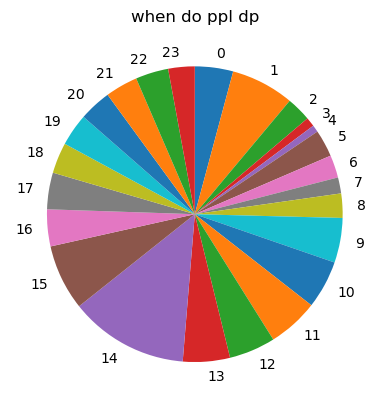

In [147]:
dp.groupby('tx_time').size().plot(kind = 'pie', startangle=90, counterclock=False, title='when do ppl dp')

the distribution of time is quite balanced.

<AxesSubplot:title={'center':'when do ppl dp (without atm)'}>

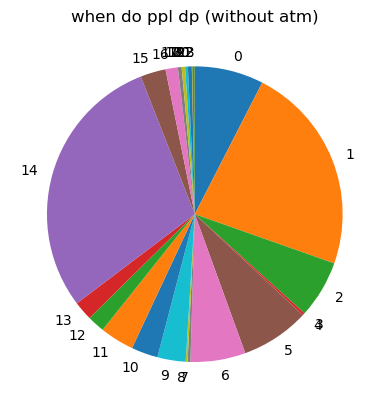

In [27]:
dp[dp['ATM'] == 0].groupby('tx_time').size().plot(kind = 'pie', startangle=90, counterclock=False, title='when do ppl dp (without atm)')

dp with atm makes the pie chart more balanced

<AxesSubplot:title={'center':'fiscTxId'}>

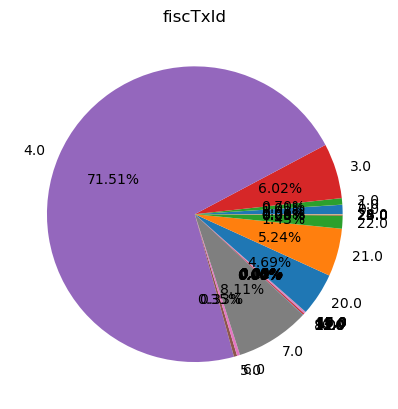

In [148]:
dp.groupby('fiscTxId').size().plot(kind = 'pie', autopct='%.2f%%', title='fiscTxId')

<AxesSubplot:title={'center':'txbranch types'}, xlabel='txbranch'>

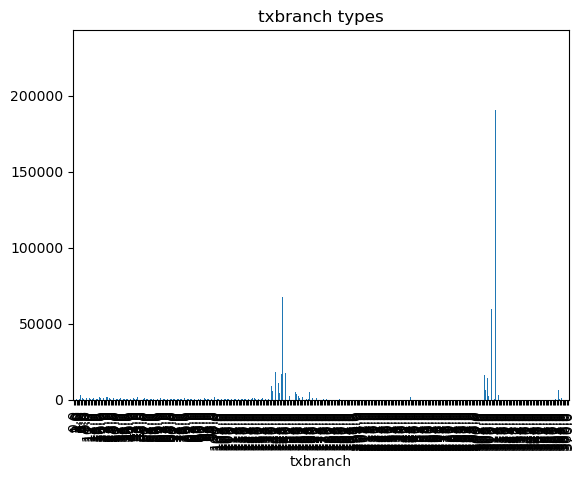

In [7]:
dp.groupby('txbranch').size().plot(kind = 'bar',title='txbranch types', rot = 90)

I can't obtain more information from this figure.

### dp, tx_type

In [153]:
print(dp['tx_type'].value_counts())

2    1847519
1     114317
3       7982
Name: tx_type, dtype: int64


In [4]:
dp.loc[ (dp['tx_type']==1) & (dp['info_asset_code']==12) ]
# there are 21830 dp are 臨櫃現金交易。

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
231,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,CR,158,14,1,1257.0,1.0,12,NaN,NaN,0,0
132855,01c705b457297805c1c08137cb3adb164b8f393c265db2...,DB,218,16,1,11658.0,1.0,12,NaN,NaN,0,0
135309,01c705b457297805c1c08137cb3adb164b8f393c265db2...,DB,218,16,1,15448.0,1.0,12,NaN,NaN,0,0
135454,02e2cb9bb3a904b4e44b7e40f54d536ca5941db440ba00...,CR,117,9,1,435.0,1.0,12,NaN,NaN,0,0
135484,02e2cb9bb3a904b4e44b7e40f54d536ca5941db440ba00...,DB,391,14,1,305.0,1.0,12,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1968597,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b...,CR,357,9,1,1007.0,1.0,12,NaN,NaN,0,0
1968602,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b...,CR,320,13,1,30212.0,1.0,12,NaN,NaN,0,0
1968625,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b...,CR,244,9,1,10071.0,1.0,12,NaN,NaN,0,0
1968880,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,CR,267,12,1,320.0,1.0,12,NaN,NaN,0,0


### dp, tx_amt

In [ ]:
len(dp[dp['tx_amt'].isnull()].groupby('cust_id').size().index)

132

In [153]:
dp.groupby('cust_id')['NTD'].head()

0           68265.0
1          932058.0
2            6089.0
3          776715.0
4           61630.0
             ...   
1968918      2507.0
1968919      9026.0
1968920      1509.0
1968921     12335.0
1968922      2011.0
Name: NTD, Length: 30124, dtype: float64

- I wanna know: is only cross_bank=1 then there are values in txbranch and fisctxid?
    - no, they are not related.

In [5]:
dp.loc[ (dp['cross_bank']==0) & (dp['fiscTxId'].notnull()) & (dp['txbranch'].notnull())]

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
154,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,CR,153,12,1,16.0,1.0,13,20.0,107.0,0,1
155,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,CR,183,7,1,73370.0,1.0,13,20.0,107.0,0,1
159,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,CR,249,15,1,1194.0,1.0,13,20.0,107.0,0,1
161,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,CR,35,10,1,52396.0,1.0,13,20.0,107.0,0,1
164,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,CR,20,14,1,1399.0,1.0,13,20.0,107.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1969755,fff94defcc33daab190e702926d583f6d805294354addb...,DB,54,23,2,1545.0,1.0,13,4.0,0.0,0,1
1969765,fff94defcc33daab190e702926d583f6d805294354addb...,DB,50,15,2,1030.0,1.0,13,4.0,0.0,0,1
1969767,fff94defcc33daab190e702926d583f6d805294354addb...,DB,62,19,2,1030.0,1.0,13,4.0,0.0,0,1
1969792,fff94defcc33daab190e702926d583f6d805294354addb...,DB,49,19,2,1030.0,1.0,13,4.0,0.0,0,1


## lets see what johndoe do 

In [13]:
johndoe_dp = dp[dp['cust_id']==johndoe]
johndoe_dp.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,NTD
376745,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,109,15,2,56.0,28.080,20,NaN,NaN,0,1,1572.48
376746,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,102,16,2,20734.0,28.015,20,NaN,NaN,0,1,580863.01
376747,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,104,13,2,45758.0,28.040,20,NaN,NaN,0,1,1283054.32
376748,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,104,13,2,1.0,28.040,20,NaN,NaN,0,1,28.04
376749,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,110,16,2,2073.0,19.420,20,NaN,NaN,0,1,40257.66


In [15]:
johndoe_dp.sort_values(['tx_date'], ascending=True)

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,NTD
377236,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,5,9,2,98571.0,0.2590,20,NaN,NaN,0,1,25529.8890
377646,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,5,9,2,5004.0,0.2590,20,NaN,NaN,0,1,1296.0360
377644,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,5,9,2,5004.0,0.2590,20,NaN,NaN,0,1,1296.0360
377233,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,5,9,2,23369.0,0.2590,20,NaN,NaN,0,1,6052.5710
377219,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,5,9,2,14056.0,0.2590,20,NaN,NaN,0,1,3640.5040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376806,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,392,16,2,20737.0,0.2268,20,NaN,NaN,0,1,4703.1516
377336,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,392,16,2,50044.0,0.2268,20,NaN,NaN,0,1,11349.9792
377364,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,392,15,2,73604.0,1.0000,1,NaN,NaN,0,1,73604.0000
377362,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,392,17,2,587.0,0.2264,20,NaN,NaN,0,1,132.8968


<AxesSubplot:title={'center':'dp per day'}, xlabel='tx_date', ylabel='No. dp'>

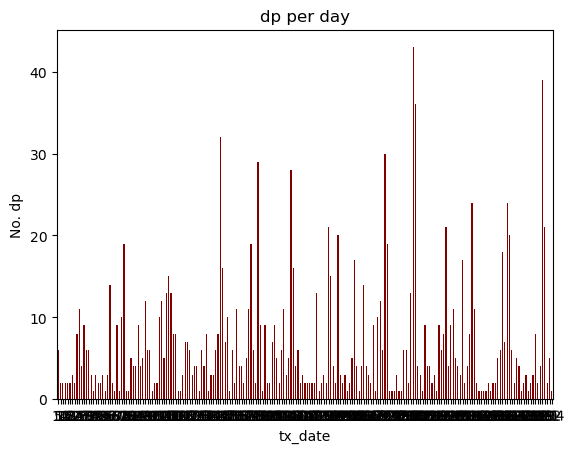

In [18]:
johndoe_dp.groupby('tx_date').size().plot(kind = "bar", ylabel="No. dp", rot=1, color ='maroon', title='dp per day')

- ? what is the simpliest way to adjust the x-axis?

In [19]:
johndoe_dp.groupby('tx_date').size().describe()

count    211.000000
mean       6.625592
std        7.246484
min        1.000000
25%        2.000000
50%        4.000000
75%        8.500000
max       43.000000
dtype: float64

In [26]:
johndoe_dp.groupby('tx_date').size().nlargest(5)

tx_date
299    43
389    39
300    36
146    32
273    30
dtype: int64

In [34]:
johndoe_dp[johndoe_dp['tx_date']==299].sort_values('tx_time', ascending=True)

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,NTD
377698,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,9,2,3008.0,1.00000,1,NaN,NaN,0,1,3008.0000
377713,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,10,2,1001.0,1.00000,13,22.0,25.0,0,1,1001.0000
377704,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,11,2,49940.0,1.00000,1,NaN,NaN,0,1,49940.0000
377746,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,12,2,10009.0,1.00000,1,NaN,NaN,0,1,10009.0000
377694,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,12,2,20018.0,1.00000,1,NaN,NaN,0,1,20018.0000
377279,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,DB,299,13,2,191.0,27.75000,20,NaN,NaN,0,1,5300.2500
377708,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,13,2,5004.0,1.00000,1,NaN,NaN,0,1,5004.0000
377253,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,15,2,402.0,0.24440,20,NaN,NaN,0,1,98.2488
377765,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,15,2,50044.0,1.00000,1,NaN,NaN,0,1,50044.0000
377750,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...,CR,299,15,2,5004.0,1.00000,1,NaN,NaN,0,1,5004.0000


In [44]:
johndoe_dp[(johndoe_dp['tx_date']==299) & (johndoe_dp['debit_credit']=='CR')].NTD.sum() - johndoe_dp[(johndoe_dp['tx_date']==299) & (johndoe_dp['debit_credit']=='DB')].NTD.sum()

603332.3106999999

johndoe debit too much money, doesn't he?

In [ ]:
johndoe_dp['tx_date'].unique()

and i try to compute everyday net debit_credit

In [74]:
jd_dp_net = pd.DataFrame({'date':[], 'net':[]})
for i in johndoe_dp['tx_date'].unique():

    net = johndoe_dp[(johndoe_dp['tx_date']==i) & (johndoe_dp['debit_credit']=='CR')].NTD.sum() - johndoe_dp[(johndoe_dp['tx_date']==i) & (johndoe_dp['debit_credit']=='DB')].NTD.sum()

    new_row = pd.DataFrame({ 'date': [i], 'net': [net] })
    
    jd_dp_net = pd.concat([jd_dp_net, new_row])

In [76]:
jd_dp_net.sort_values('date').head()  # net? this format???

,date,net
0,5.0,17077.165
0,14.0,28650.555
0,15.0,-50340.720
0,16.0,20117.000
0,18.0,31329.750


group standardization

## Concat the dfs by ...?

if we use `json` file, it would look like this:
```
id_df:{
    id1:{ccba:{lupay:[0:13],
               cycam:[0:13],
               usgam:[0:13],...},
        cdtx:{date:[],
              country:[],...},
        info:{alert_key:[],
              risk_rank:[],...},
        dp:{dp_cd:[],
            date:[],...},
        remit:{date:[],
               no:[],
               amt:[]}
        }
    id2:{}
}
```

In [9]:
id_ccba = ccba.groupby('cust_id')
id_cdtx = cdtx.groupby('cust_id')
id_info = custinfo.groupby('cust_id')
id_dp = dp.groupby('cust_id')
id_remit = remit.groupby('cust_id')

In [11]:
print(len(id_ccba), len(id_cdtx), len(id_info), len(id_dp), len(id_remit))

4745 3945 7708 6196 1144


In [ ]:
## this line would crack down my computer
# df = ccba.merge(cdtx,on='cust_id',how='outer').merge(custinfo,on='cust_id',how='outer').merge(dp,on='cust_id',how='outer').merge(remit,on='cust_id',how='outer')